In [1]:
from coders import RMSASK as Coder, BitStream
from coders.pipeline import Pipeline
from coders.ga import Population
import warnings
warnings.filterwarnings('ignore')

pipeline = Pipeline('.', no_lock=False)

gen_iter = 30
gen_time = 600

[19564] Lock acquired: 6


In [2]:
def coder_fitness(cutoff=0.95, size=300):
    def fn(coder, raw=False):
        input_source = BitStream(np.random.randint(2, size=size))
        r, q = pipeline.test(coder, input_source)
        if q < cutoff:
            r = 0
        if raw:
            return r, q
        return r * q ** 5
    return fn

In [3]:
population = Population(Coder, coder_fitness(0), 100, 0.2, 0.1)
population.evolve(10000, max_iter=2*gen_iter, max_time=gen_time)
population.fn = coder_fitness(0.70)
population.evolve(10000, max_iter=gen_iter, max_time=gen_time)
population.fn = coder_fitness(0.90)
population.evolve(10000, max_iter=gen_iter, max_time=gen_time)
population.fn = coder_fitness(0.95)
population.evolve(10000, max_iter=gen_iter, max_time=gen_time)
population.fn = coder_fitness(0.98)
population.evolve(10000, max_iter=gen_iter, max_time=gen_time)

Gen 1 grades: 1205/724/327
Gen average time: 0:00:12.650016
Gen 2 grades: 1897/1038/502
Gen average time: 0:00:12.501014
Gen 3 grades: 1897/1292/727
Gen average time: 0:00:12.489179
Gen 4 grades: 2313/1529/891
Gen average time: 0:00:12.346369
Gen 5 grades: 2344/1706/1004
Gen average time: 0:00:12.352977
Gen 6 grades: 2717/1874/1204
Gen average time: 0:00:12.405326
Gen 7 grades: 2434/1854/1138
Gen average time: 0:00:12.639848
Gen 8 grades: 2470/1834/1106
Gen average time: 0:00:12.748063
Gen 9 grades: 2176/1814/1152
Gen average time: 0:00:12.915921
Gen 10 grades: 2505/1989/1198
Gen average time: 0:00:13.080721
Gen 11 grades: 2769/2165/1461
Gen average time: 0:00:13.311311
Gen 12 grades: 2747/2226/1392
Gen average time: 0:00:13.343714
Gen 13 grades: 2717/2259/1408
Gen average time: 0:00:13.584063
Gen 14 grades: 2833/2359/1624
Gen average time: 0:00:13.855410
Gen 15 grades: 2747/2248/1281
Gen average time: 0:00:13.755664
Gen 16 grades: 2844/2362/1389
Gen average time: 0:00:13.671758
Gen 17

In [4]:
sg = np.array([sorted(grades, reverse=True) for grades in population.grades])
top75 = sg[:, :3 * population.size // 4].mean(axis=1)
top25 = sg[:, :population.size // 4].mean(axis=1)
top1 = sg[:, :1].mean(axis=1)

out/RMSASK_GA_1373280560800.pdf


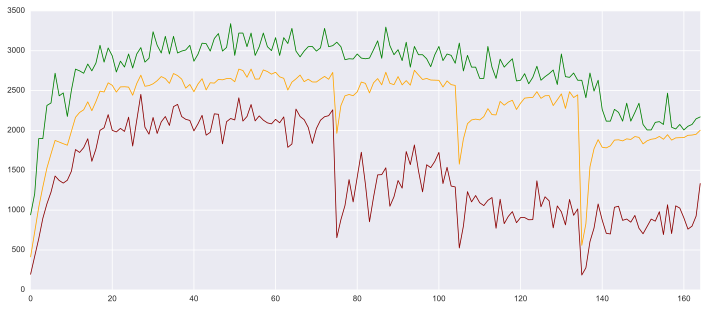

In [5]:
f = 'out/{}_GA_{}.pdf'.format(Coder.__name__, id(pipeline))
sns.tsplot(top75, color='darkred')
sns.tsplot(top25, color='orange')
sns.tsplot(top1, color='green')
print(f)
plt.savefig(f, bbox_inches='tight', pad_inches=0)
plt.show()

In [6]:
for c in population._sort(10000):
    print(c)

RMSASK:
    d_low_amplitude: 0.8314797091642
    filter_std_base: 23
    filter_window_scale: 0.21789014259575723
    frequency: 1846
    rate: 96000
    high_amplitude: 0.7598663419226516
    sqe_end_v: 0.539491667218256
    filter_shape: 0.58686526957978
    filter_window_base: 8
    symbol_width: 1
    low_amplitude: 0.0195608342731707
    sqe_start_v: 0.43128253971978003
    sqe_start: 0.35700508131608144
    peak_width_start: 0.2582981136982485
    d_high_amplitude: 0.3940108540000231
    filter_std_scale: 0.3239522452131439
    peak_threshold: 0.570186772597008
    peak_width_span: 0.25186583656627193
    filter_type: 1
    sqe_end: 0.1392539132388015
    symbol_duration: 0.0004148874916080073
    amplitude: 0.9336172276329942
RMSASK:
    d_low_amplitude: 0.5822494270623298
    filter_std_base: 7
    filter_window_scale: 0.2087870339067367
    frequency: 2256
    rate: 96000
    high_amplitude: 0.8535429652978723
    sqe_end_v: 0.3043702195046802
    filter_shape: 0.7204565305815

In [8]:
population.evolve(10000, max_iter=3*gen_iter, max_time=gen_time)

Gen 165 grades: 2207/1995/714
Gen average time: 0:00:14.909586
Gen 166 grades: 2182/2014/889
Gen average time: 0:00:14.885926
Gen 167 grades: 2110/2030/911
Gen average time: 0:00:15.189144
Gen 168 grades: 2146/2032/835
Gen average time: 0:00:14.779452
Gen 169 grades: 2182/2043/1220
Gen average time: 0:00:14.658512
Gen 170 grades: 2110/1954/659
Gen average time: 0:00:14.348043
Gen 171 grades: 2075/2016/965
Gen average time: 0:00:13.897524
Gen 172 grades: 2153/2048/902
Gen average time: 0:00:13.458562
Gen 173 grades: 2227/2052/716
Gen average time: 0:00:13.334189
Gen 174 grades: 2302/2044/795
Gen average time: 0:00:13.226674
Gen 175 grades: 2303/2042/698
Gen average time: 0:00:13.011587
Gen 176 grades: 2182/2057/718
Gen average time: 0:00:13.105332
Gen 177 grades: 2227/2044/687
Gen average time: 0:00:12.984473
Gen 178 grades: 2146/2029/637
Gen average time: 0:00:12.867891
Gen 179 grades: 2284/2071/776
Gen average time: 0:00:12.832149
Gen 180 grades: 2110/2046/717
Gen average time: 0:00:1

In [9]:
sg = np.array([sorted(grades, reverse=True) for grades in population.grades])
top75 = sg[:, :3 * population.size // 4].mean(axis=1)
top25 = sg[:, :population.size // 4].mean(axis=1)
top1 = sg[:, :1].mean(axis=1)

out/RMSASK_GA_1373280560800_2.pdf


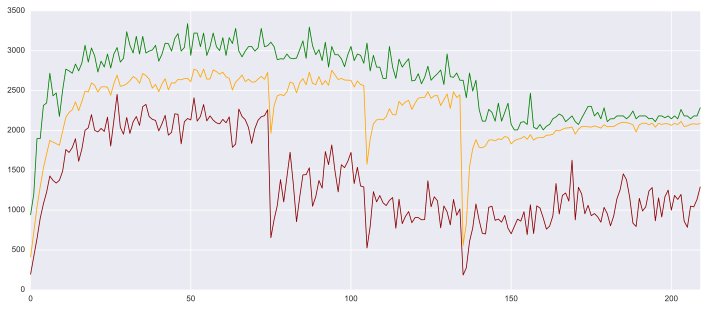

In [10]:
f = 'out/{}_GA_{}_2.pdf'.format(Coder.__name__, id(pipeline))
sns.tsplot(top75, color='darkred')
sns.tsplot(top25, color='orange')
sns.tsplot(top1, color='green')
print(f)
plt.savefig(f, bbox_inches='tight', pad_inches=0)
plt.show()

In [12]:
for c in population._sort(10000)[:3]:
    print(*coder_fitness(0, 3000)(c, raw=True))
    print(c)

2526.315789473684 0.963
RMSASK:
    d_low_amplitude: 0.23395040120090083
    filter_std_base: 18
    filter_window_scale: 0.1858851956413788
    frequency: 2014
    rate: 96000
    high_amplitude: 0.7622001699482773
    sqe_end_v: 0.510198285750039
    filter_shape: 0.7298106227794998
    filter_window_base: 12
    symbol_width: 1
    low_amplitude: 0.0784640525424439
    sqe_start_v: 0.24769542710200376
    sqe_start: 0.4830900503752117
    peak_width_start: 0.18133678634081943
    d_high_amplitude: 0.6548697603713329
    filter_std_scale: 0.22344241800680315
    peak_threshold: 0.6732711212375551
    peak_width_span: 0.5651430666332287
    filter_type: 1
    sqe_end: 0.18579850907870663
    symbol_duration: 0.00039205135249750555
    amplitude: 0.94080143999692
2181.818181818182 0.984
RMSASK:
    d_low_amplitude: 0.4659215570383489
    filter_std_base: 33
    filter_window_scale: 0.2545214916288537
    frequency: 2182
    rate: 96000
    high_amplitude: 0.7512466541896042
    sqe_end